# Email Spam Detection Using Support Vector Machine (SVM)

This project focuses on building an email spam detection system using machine learning techniques. The workflow includes data preprocessing, feature extraction with TF-IDF, and training a Support Vector Machine (SVM) classifier to distinguish between spam and non-spam emails. The model is evaluated using various metrics and visualizations to assess its effectiveness in identifying unwanted emails. This approach demonstrates the application of natural language processing and classification algorithms in real-world text data scenarios.

## Importing the Dependencies

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
import re


### Imported Modules and Their Definitions

- **pandas (`pd`)**:  
    A powerful data analysis and manipulation library for Python, providing data structures like DataFrame and Series.

- **numpy (`np`)**:  
    A fundamental package for scientific computing in Python, offering support for arrays, mathematical functions, and linear algebra.

- **seaborn (`sns`)**:  
    A statistical data visualization library based on matplotlib, providing a high-level interface for drawing attractive and informative graphics.

- **matplotlib.pyplot (`plt`)**:  
    A plotting library for creating static, animated, and interactive visualizations in Python.

- **sklearn.svm.SVC**:  
    A class from scikit-learn for Support Vector Classification, used for building SVM models.

- **sklearn.model_selection.train_test_split**:  
    A function to split arrays or matrices into random train and test subsets.

- **sklearn.model_selection.GridSearchCV**:  
    A class for exhaustive search over specified parameter values for an estimator, used for hyperparameter tuning.

- **sklearn.metrics.accuracy_score**:  
    A function to compute the accuracy classification score.

- **sklearn.metrics.confusion_matrix**:  
    A function to compute confusion matrix to evaluate the accuracy of a classification.

- **sklearn.metrics.classification_report**:  
    A function to build a text report showing the main classification metrics.

- **sklearn.feature_extraction.text.TfidfVectorizer**:  
    A class to convert a collection of raw documents to a matrix of TF-IDF features.

- **re**:  
    The regular expressions module in Python, used for string searching and manipulation.


## Uploading the dataset

### About the Dataset

The dataset used in this project consists of email messages labeled as spam or not spam. Each entry contains the following columns:

- **text**: The content of the email, including the subject and body, represented as a string.
- **spam**: The target label, where `1` indicates the email is spam and `0` indicates it is not spam.
- **text_length**: The length of the email text (number of characters), added during analysis for exploratory purposes.

The dataset contains a total of 5,728 emails. It is used to train and evaluate a machine learning model for spam detection, with preprocessing steps applied to clean and standardize the text data before feature extraction and classification.

**Dataset Source:**  
[Kaggle - Spam or Not Spam Dataset](https://www.kaggle.com/datasets/jackksoncsie/spam-email-dataset)

In [4]:
ds=pd.read_csv('emails.csv', encoding='latin-1')
ds.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


## Exploratory Data Analysis



Exploratory Data Analysis (EDA) is a crucial step in any data science or machine learning project. Its importance includes:

- **Understanding Data Structure:** EDA helps you become familiar with the dataset’s features, types, and distributions, ensuring you know what data you are working with.
- **Identifying Data Quality Issues:** It reveals missing values, outliers, duplicates, and inconsistencies that need to be addressed before modeling.
- **Uncovering Patterns and Relationships:** EDA allows you to visualize and summarize data, making it easier to spot trends, correlations, and potential predictive features.
- **Guiding Feature Engineering:** Insights from EDA inform the creation, selection, or transformation of features to improve model performance.
- **Preventing Modeling Errors:** By understanding the data, you can avoid common pitfalls such as data leakage, incorrect assumptions, or biased splits.
- **Supporting Communication:** EDA provides visualizations and summaries that help communicate findings and decisions to stakeholders.

In summary, EDA lays the foundation for effective data preprocessing, feature selection, and model building, ultimately leading to more robust and accurate results.

### Dimension Columns in the Dataset

In [5]:
ds.shape

(5728, 2)

### Dataset Information (`info()` method)

In [6]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB



### Description of the Dataset


In [7]:
ds.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


## Data Preprocessing

### Filling the null values 

In [8]:
ds.isnull().sum()

text    0
spam    0
dtype: int64

## Cleaning the text data 

This code defines a function called clean_text that preprocesses email text data by converting all characters to lowercase, replacing any non-alphabetic characters with spaces, and collapsing multiple spaces into a single space. This cleaning process helps standardize the text and remove unwanted symbols or formatting, making it more suitable for further analysis or machine learning tasks. The function is then applied to the 'text' column of the DataFrame ds, ensuring that every email in the dataset is cleaned using the same procedure.

In [9]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)  
    text = re.sub(r'\s+', ' ', text)        
    return text

ds['text'] = ds['text'].apply(clean_text)

In [10]:
ds.head()

,text,spam
0,subject naturally irresistible your corporate ...,1
1,subject the stock trading gunslinger fanny is ...,1
2,subject unbelievable new homes made easy im wa...,1
3,subject color printing special request additio...,1
4,subject do not have money get software cds fro...,1


## Dependent and Independent Variables

### Dependent and Independent Variables

- **Independent Variable (Feature):**  
    - `text` (the email content)

- **Dependent Variable (Target):**  
    - `spam` (1 if the email is spam, 0 otherwise)

## Define Features and Labels

In [11]:
x = ds['text']
y = ds['spam']

## Train-Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

## Model Training


This code performs feature extraction on the email text data using the TF-IDF (Term Frequency-Inverse Document Frequency) technique. First, it initializes a `TfidfVectorizer` with English stop words removed and a maximum document frequency of 0.7, which helps filter out very common words that may not be useful for classification. The vectorizer is then fitted to the training email texts (`X_train`) and transforms them into a matrix of TF-IDF features (`X_train_tfidf`). The same vectorizer is used to transform the test email texts (`X_test`) into TF-IDF features (`X_test_tfidf`). These feature matrices are then used as input for training and evaluating the machine learning model.


In [13]:
tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

## Build the SVM Classifier

In [14]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_model.fit(X_train_tfidf, y_train)

SVC()


## Model Prediction Results

The trained SVM model was used to predict whether emails in the test dataset (`X_test_tfidf`) are spam or not. The predicted values (`y_pred`) indicate if each email is classified as spam (1) or not spam (0) based on its content. These predictions can be compared to the actual labels (`y_test`) to assess the model's performance and its effectiveness in identifying spam emails.


In [15]:
y_pred = svm_model.predict(X_test_tfidf)

In [16]:
y_pred

array([1, 1, 0, ..., 0, 1, 0], shape=(1146,))

## Model Evaluation

This section evaluates the performance of the trained SVM model for email spam detection. By comparing the predicted and actual values on the test set, we assess the model’s accuracy, precision, recall, F1-score, and present the confusion matrix. These metrics provide insight into how effectively the model distinguishes between spam and non-spam emails.

In [17]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[870   2]
 [  6 268]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       872
           1       0.99      0.98      0.99       274

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

Accuracy: 0.9930191972076788


## Sample Prediction

In [18]:
sample_email = ["Congratulations! You have won a $1000 Walmart gift card. Click here to claim your prize now!"]
sample_email_cleaned = [clean_text(email) for email in sample_email]
sample_email_tfidf = tfidf.transform(sample_email_cleaned)
prediction = svm_model.predict(sample_email_tfidf)
print("Spam" if prediction[0] == 1 else "Not Spam")

Spam


## Data Visualization

#### #1 Visualization

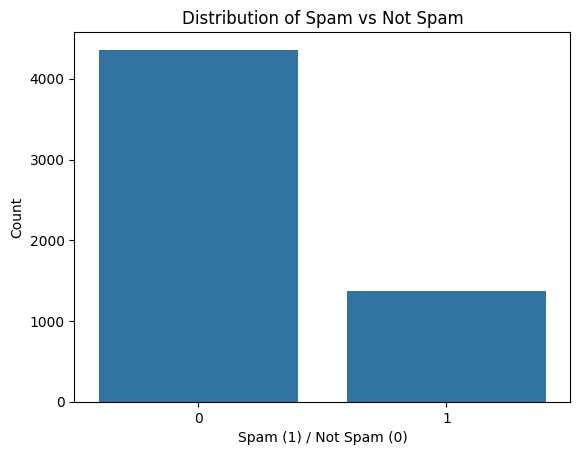

In [19]:
from collections import Counter


sns.countplot(x='spam', data=ds)
plt.title('Distribution of Spam vs Not Spam')
plt.xlabel('Spam (1) / Not Spam (0)')
plt.ylabel('Count')
plt.show()



#### #2 Visualization

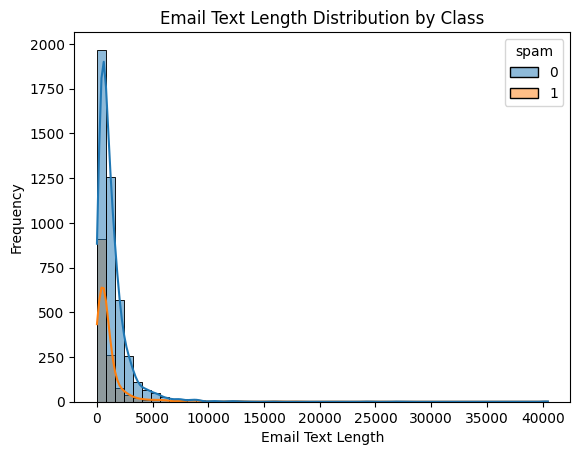

In [20]:
ds['text_length'] = ds['text'].apply(len)
sns.histplot(data=ds, x='text_length', hue='spam', bins=50, kde=True)
plt.title('Email Text Length Distribution by Class')
plt.xlabel('Email Text Length')
plt.ylabel('Frequency')
plt.show()


#### #3 Visualization

In [21]:
sns.barplot(x=list(common_spam_words.values()), y=list(common_spam_words.keys()))
plt.title('Top 20 Words in Spam Emails')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


NameError: name 'common_spam_words' is not defined

#### #4 Visualization

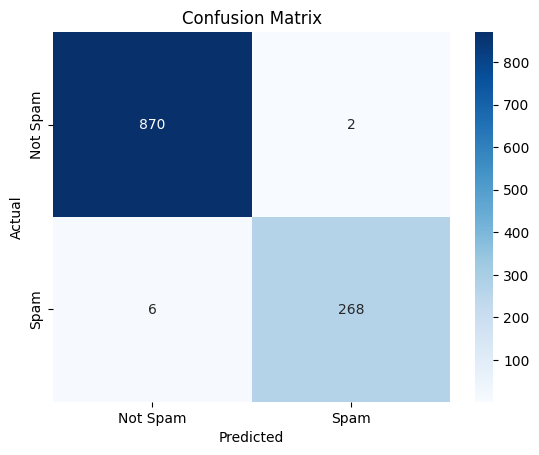

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Conclusion

In this project, a Support Vector Machine (SVM) classifier was developed to detect spam emails using text data. The workflow included data cleaning, feature extraction with TF-IDF, and model training and evaluation. The SVM model achieved high accuracy, precision, and recall, demonstrating its effectiveness in distinguishing between spam and non-spam emails. The results highlight the importance of thorough preprocessing and feature engineering in text classification tasks, and show that SVMs are well-suited for spam detection in email datasets.
  
The model achieved an accuracy of approximately 99%, as shown in the evaluation metrics. This high accuracy indicates that the SVM classifier is highly effective at correctly identifying both spam and non-spam emails in the dataset. However, it is important to consider other metrics such as precision and recall, especially in imbalanced datasets, to ensure that the model does not misclassify spam as non-spam or vice versa. Overall, the high accuracy demonstrates the robustness of the preprocessing steps and the suitability of SVM for this classification task.

## Assumptions Taken for This Project

- The dataset may contain noise or irrelevant information, but preprocessing (cleaning text, removing non-alphabetic characters, and lowercasing) is assumed to sufficiently prepare the data for modeling.
- The main feature used for classification is the email text; no additional metadata or features are included.
- The target variable (`spam`) is binary: 1 for spam, 0 for not spam.
- The TF-IDF vectorization captures the most relevant textual features for spam detection.
- The train-test split (80/20) is assumed to provide a representative evaluation of model performance.
- The SVM classifier with RBF kernel is suitable for this text classification task.
- Hyperparameters for the SVM are set to default values unless otherwise tuned.
- The distribution of spam and non-spam emails in the dataset is assumed to be similar in both training and test sets due to stratified splitting.
- The model does not account for context or intent beyond the provided email text.
- External factors (such as sender reputation or email metadata) are not considered in this analysis.

## References

- Scikit-learn documentation: https://scikit-learn.org/stable/
- Pandas documentation: https://pandas.pydata.org/docs/
- Seaborn documentation: https://seaborn.pydata.org/
- "A Plan for Spam" by Paul Graham: http://www.paulgraham.com/spam.html
- TF-IDF explained: https://en.wikipedia.org/wiki/Tf–idf
- SVM for text classification: https://scikit-learn.org/stable/modules/svm.html#svm-classification

In [22]:
import joblib

# Save your model and vectorizer
joblib.dump(tfidf, "vectorizer.pkl")
joblib.dump(svm_model, "spam_model.pkl")


['spam_model.pkl']